In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

from netCDF4 import Dataset

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/AVHRR_9km/xbt_ctd_coords.mat'
coords = sio.loadmat(cfname)

botlat = coords['bot_lat']
botlon = coords['bot_lon']
xbtlon = coords['xbt_lon'].transpose()
xbtlat = coords['xbt_lat'].transpose()

# import the NOAA SST data
cfname = '/Volumes/sclayton/kuroshio/satellite/20091018-mcsstd.mat'
sst = sio.loadmat(cfname)
# create a masked array where missing data is set as "bad"
bad = (sst['sst']==5)
temp = np.ma.masked_where(bad, sst['sst'])


In [3]:
# # open data file for land mask

# land_mask = '/Users/sclayton/Google Drive/satellite_data/lsmask-world8-var.dist5.5.nc'
# fh = Dataset(land_mask, mode='r')

# fh.variables
# å
# lat = fh.variables['lat'][:]
# lon = fh.variables['lon'][:]

# ny = 19277
# nx = 43200

# land = fh.variables['dst']

# LAND = (land[:].reshape(ny, nx))
# x,y = np.meshgrid(lon,lat)

# fh.close()
# del fh

# plt.pcolor(x, y, LAND)
# plt.show()

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


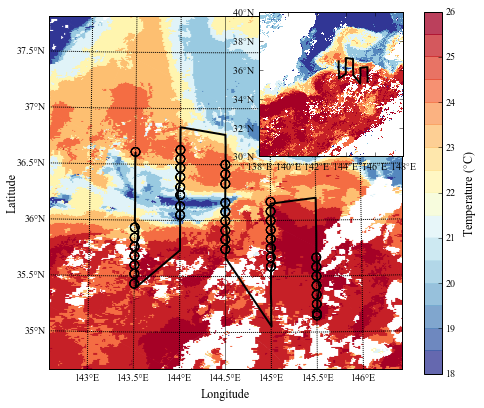

In [4]:
# make a plot of the data
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

palette = plt.get_cmap('RdYlBu_r',16)

fig1 = plt.figure(1, figsize=(7, 7), dpi = 600)

m = Basemap(width=350000,height=350000,projection='lcc',
            resolution='c',lat_1=34.75,lat_2=37.75,lat_0=36.25,lon_0=144.5)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r',16)
palette.set_bad('w',1.0)
im = m.pcolormesh(sst['loni'], sst['lati'], temp,shading = 'flat', cmap=palette, latlon=True, vmin= 18, vmax = 26, alpha = 0.75)
x,y = m(botlon,botlat)
m.scatter(x,y,s=75,facecolors='none', edgecolors='k')
xx,xy = m(xbtlon,xbtlat)
m.plot(xx,xy, 'k',linewidth=2)

m.drawparallels(np.arange(30,50,0.5),labels=[1,0,0,0])
m.drawmeridians(np.arange(138,153,0.5),labels=[1,1,0,1])

cb = plt.colorbar(im, shrink=.75)
cb.set_label(label=r'Temperature ($^{\circ}$C)',fontsize=12)

plt.xlabel(r'Longitude', fontsize=12, labelpad=20)
plt.ylabel(r'Latitude', fontsize=12, labelpad=30)

plt.tick_params(axis='left', which='major', labelsize=12, pad = 20)

# add inset with larger scale map
ax = plt.subplot(1,1,1)
ax2 = inset_axes(ax, width=2, height=2,  loc=3,
                 bbox_to_anchor=(0.51, 0.56),
                 bbox_transform=ax.figure.transFigure)

ax2.pcolormesh(sst['loni'], sst['lati'], temp,shading = 'flat', cmap=palette, vmin= 18, vmax = 26)
ax2.plot(xbtlon,xbtlat, 'k',linewidth=2)

ax2.set_xlim([138, 148])
ax2.set_ylim([30, 40])
ax2.set_yticks([30, 32, 34, 36, 38, 40])
ax2.set_yticklabels([r'30$^{\circ}$N',r'32$^{\circ}$N',r'34$^{\circ}$N', r'36$^{\circ}$N', r'38$^{\circ}$N', r'40$^{\circ}$N'])
ax2.set_xticks([138,140, 142, 144, 146, 148])
ax2.set_xticklabels([r'138$^{\circ}$E',r'140$^{\circ}$E',r'142$^{\circ}$E',r'144$^{\circ}$E',r'146$^{\circ}$E',r'148$^{\circ}$E'])

#fig1.savefig('/Users/sclayton/Desktop/LO_fig1.tiff', format='tiff', dpi=600)